In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
dataset = pd.read_csv('Obesity_data.csv')

In [3]:
dataset.head()

,Gender,Age,Height,Weight,FAWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_Level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
dataset.iloc[:,16].value_counts()

Obesity_Level
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

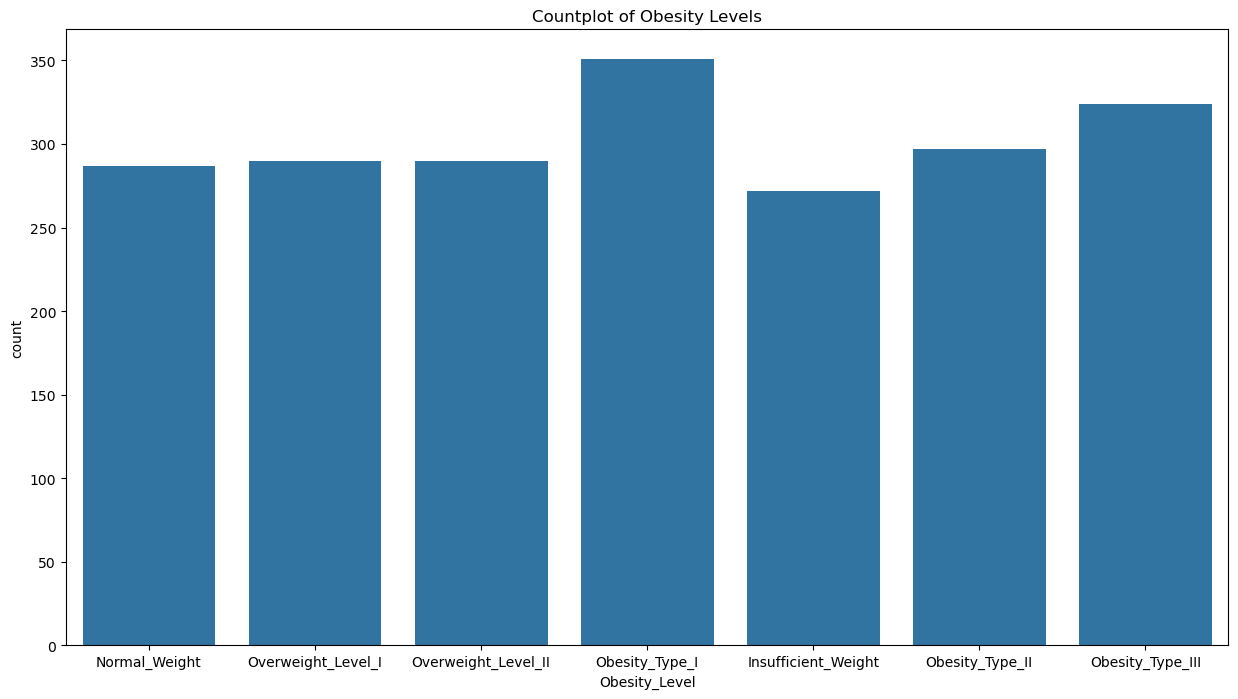

In [5]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Obesity_Level', data=dataset)
plt.title('Countplot of Obesity Levels')
plt.show()

In [6]:
df =dataset.drop('Obesity_Level', axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  2111 non-null   object 
 1   Age     2111 non-null   float64
 2   Height  2111 non-null   float64
 3   Weight  2111 non-null   float64
 4   FAWO    2111 non-null   object 
 5   FAVC    2111 non-null   object 
 6   FCVC    2111 non-null   float64
 7   NCP     2111 non-null   float64
 8   CAEC    2111 non-null   object 
 9   SMOKE   2111 non-null   object 
 10  CH2O    2111 non-null   float64
 11  SCC     2111 non-null   object 
 12  FAF     2111 non-null   float64
 13  TUE     2111 non-null   float64
 14  CALC    2111 non-null   object 
 15  MTRANS  2111 non-null   object 
dtypes: float64(8), object(8)
memory usage: 264.0+ KB


In [8]:
#checking if there is any null value in the dataset

df.iloc[:,:].isnull().values.any()

False

In [9]:

from sklearn import preprocessing

#input variables one hot encoding
enc = preprocessing.OneHotEncoder(drop='first')
onehots = enc.fit_transform(df[['Gender','FAWO','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']]).toarray()

#creating the new df
cols = [ ]
for i in enc.categories_:
    i = np.delete(i,0)
    cols.extend(i)
df = df.join(pd.DataFrame(onehots, columns=cols))
df = df.drop(['Gender','FAWO','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS'], axis=1)
df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Male,yes,...,no,yes,yes,Frequently,Sometimes,no,Bike,Motorbike,Public_Transportation,Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [10]:
enc.categories_

[array(['Female', 'Male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['Always', 'Frequently', 'Sometimes', 'no'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['Always', 'Frequently', 'Sometimes', 'no'], dtype=object),
 array(['Automobile', 'Bike', 'Motorbike', 'Public_Transportation',
        'Walking'], dtype=object)]

In [11]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Male,yes,...,no,yes,yes,Frequently,Sometimes,no,Bike,Motorbike,Public_Transportation,Walking
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,...,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,0.505921,0.817622,...,0.024159,0.020843,0.045476,0.033160,0.663667,0.302700,0.003316,0.005211,0.748460,0.026528
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,0.500083,0.386247,...,0.153580,0.142893,0.208395,0.179096,0.472566,0.459535,0.057502,0.072015,0.434001,0.160737
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    2111 non-null   float64
 1   Height                 2111 non-null   float64
 2   Weight                 2111 non-null   float64
 3   FCVC                   2111 non-null   float64
 4   NCP                    2111 non-null   float64
 5   CH2O                   2111 non-null   float64
 6   FAF                    2111 non-null   float64
 7   TUE                    2111 non-null   float64
 8   Male                   2111 non-null   float64
 9   yes                    2111 non-null   float64
 10  yes                    2111 non-null   float64
 11  Frequently             2111 non-null   float64
 12  Sometimes              2111 non-null   float64
 13  no                     2111 non-null   float64
 14  yes                    2111 non-null   float64
 15  yes 

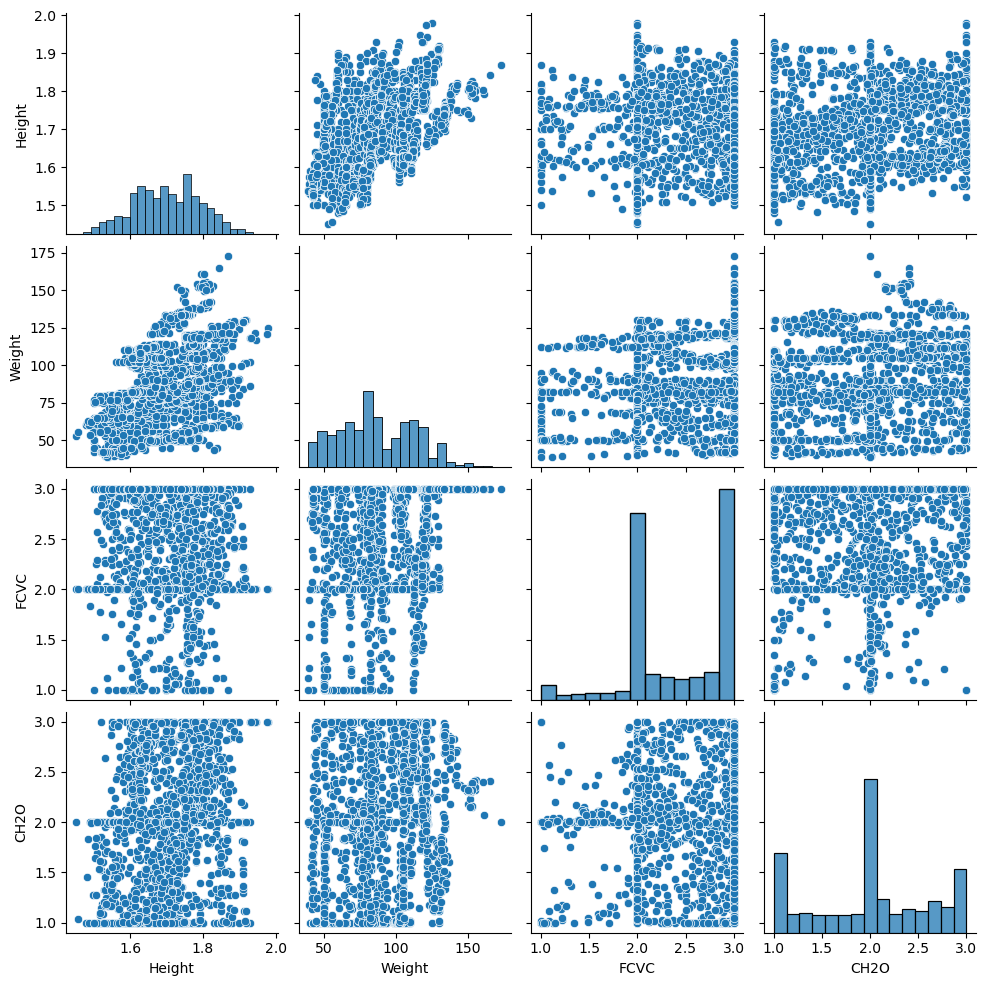

In [13]:
Y = df.iloc[:,[1,2,3,5]]
sns.pairplot(Y)

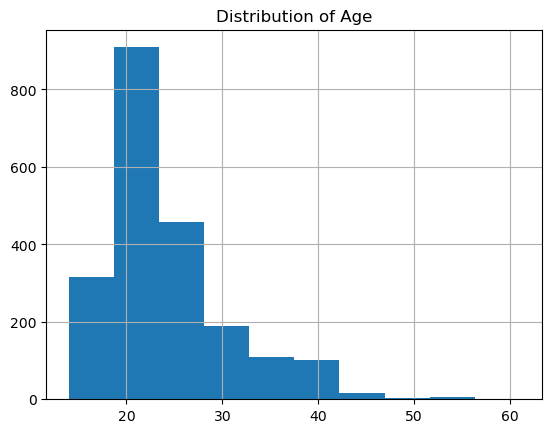

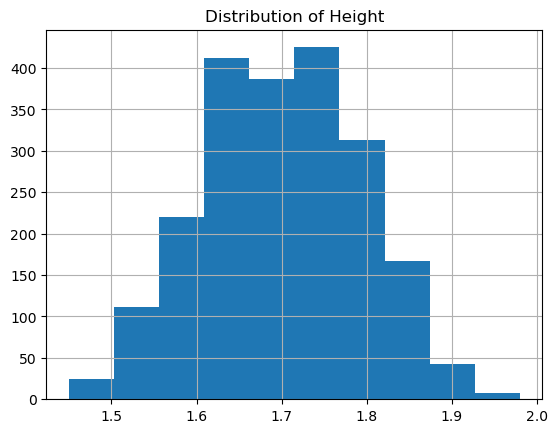

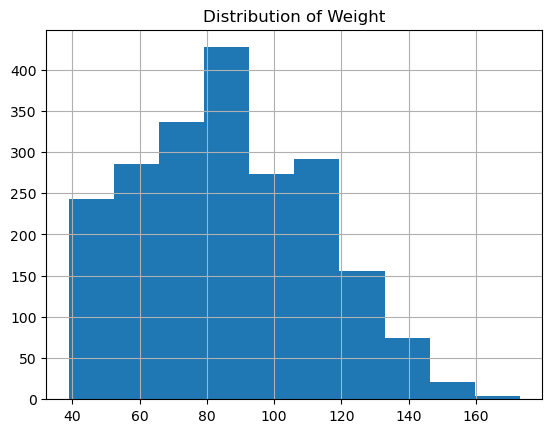

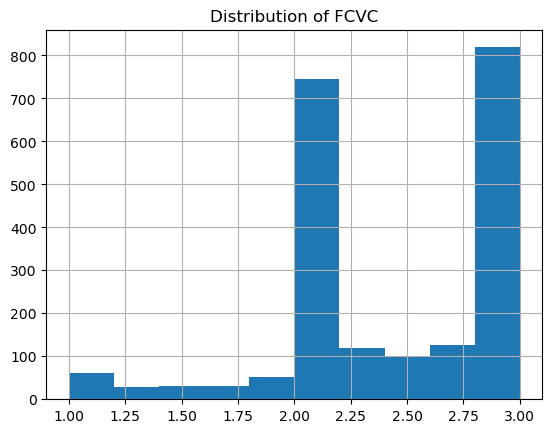

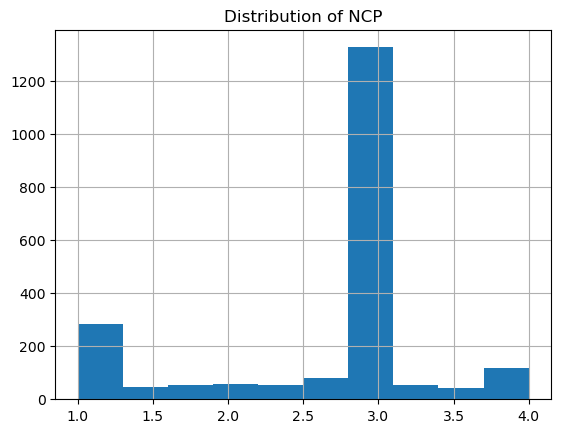

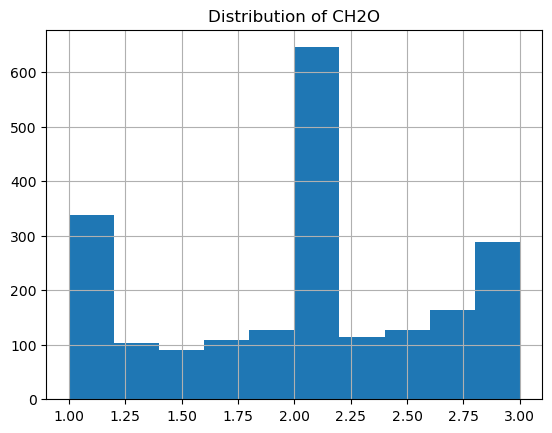

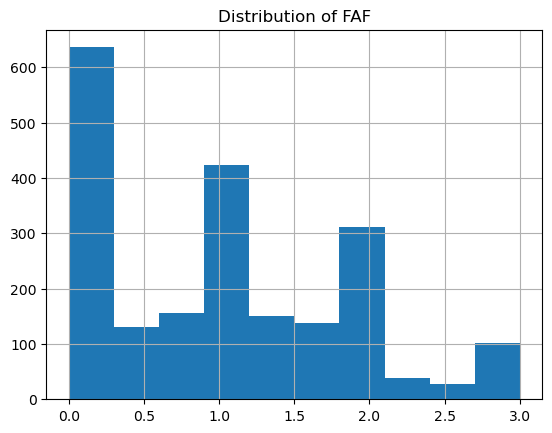

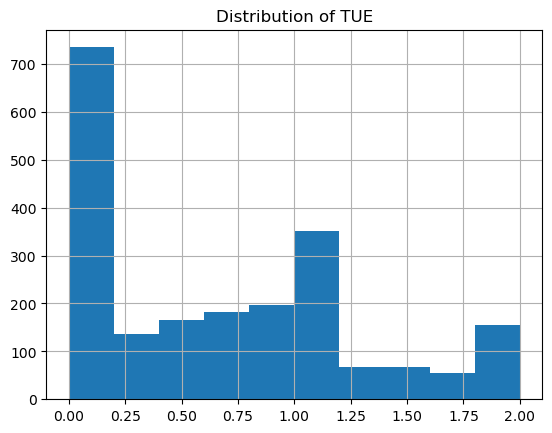

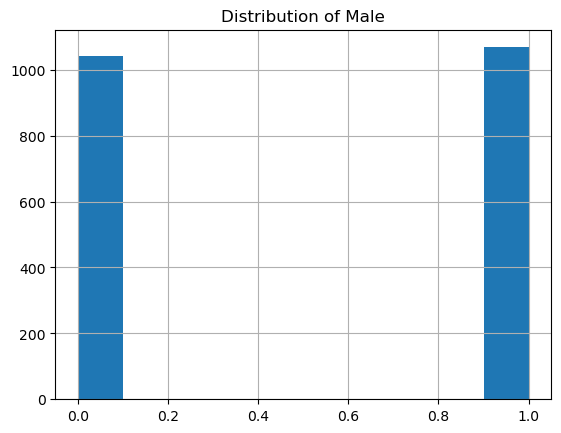

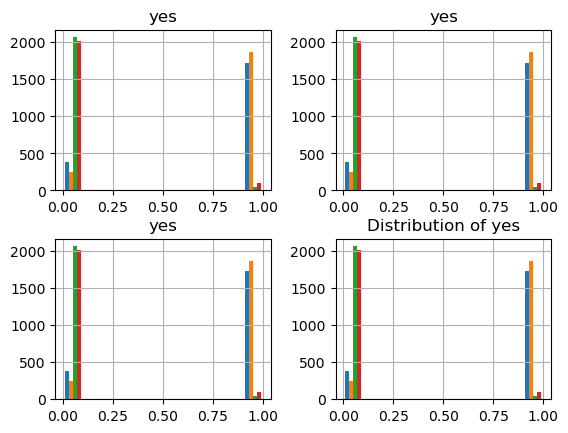

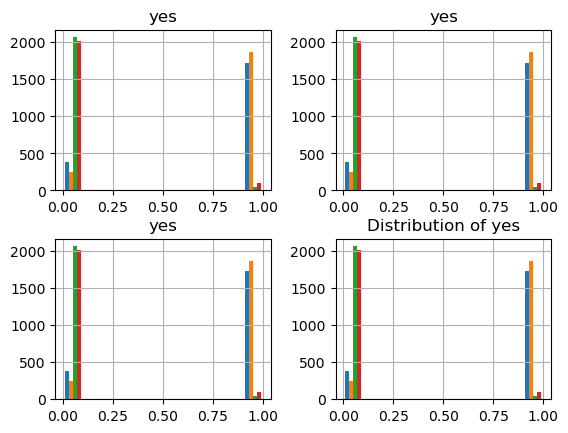

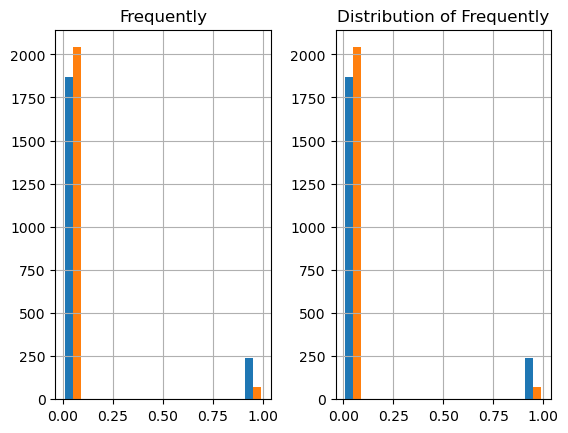

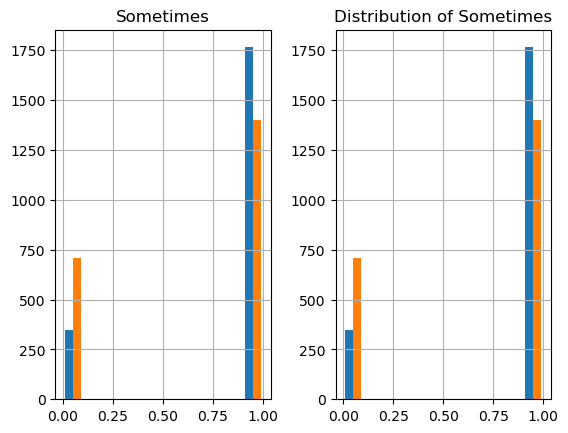

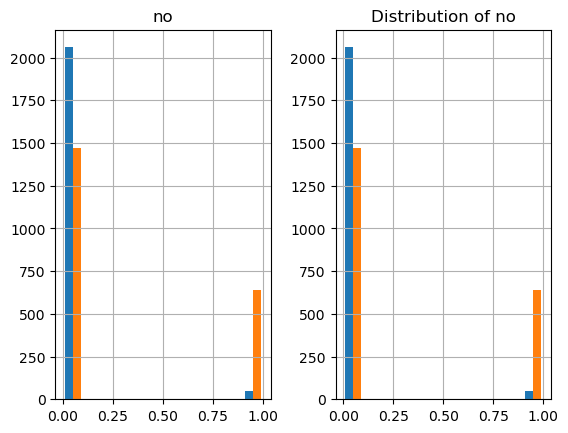

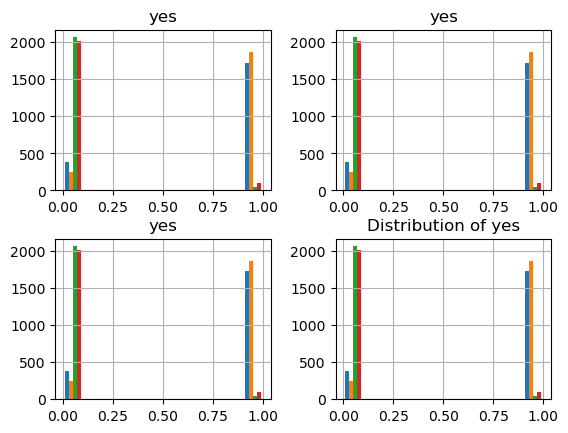

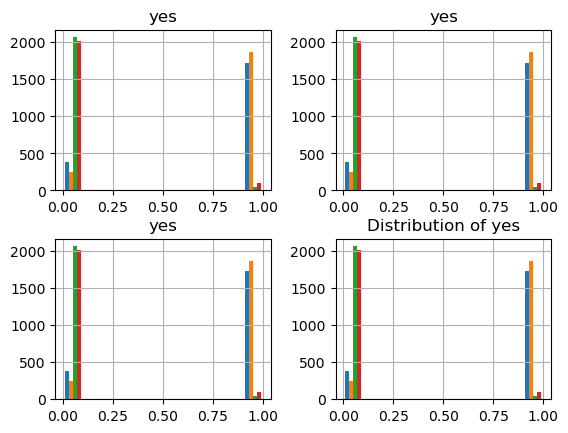

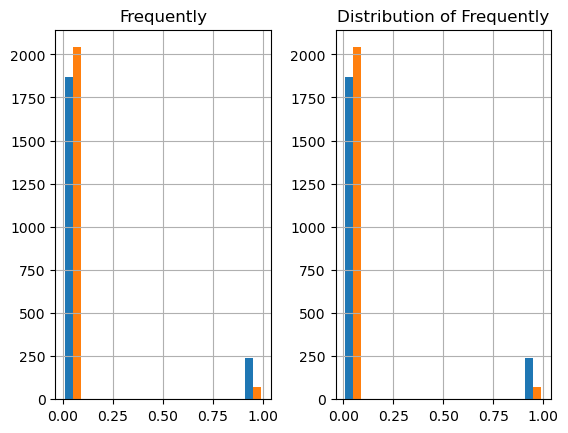

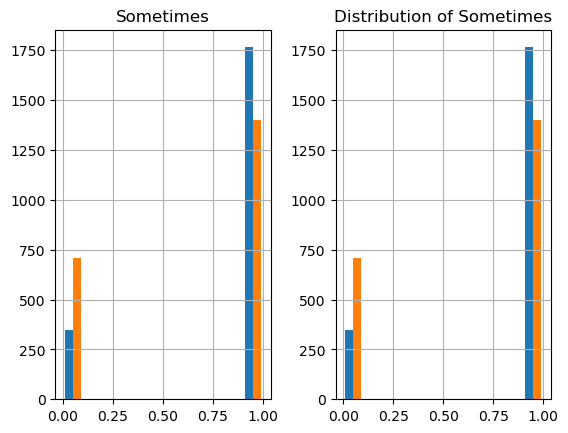

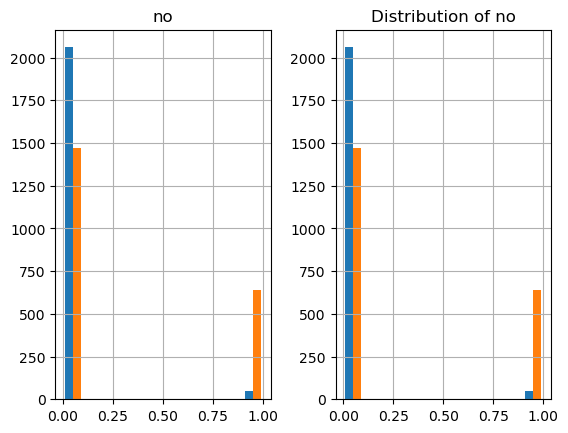

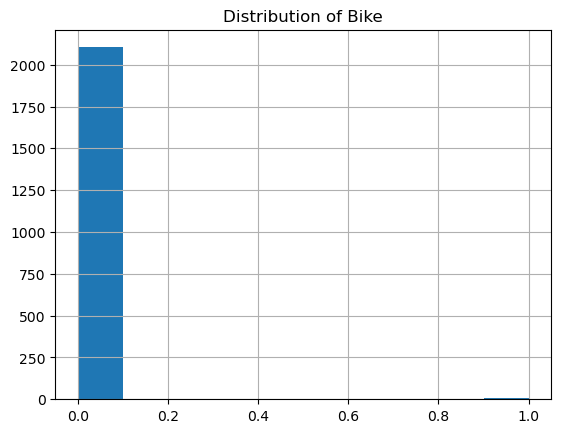

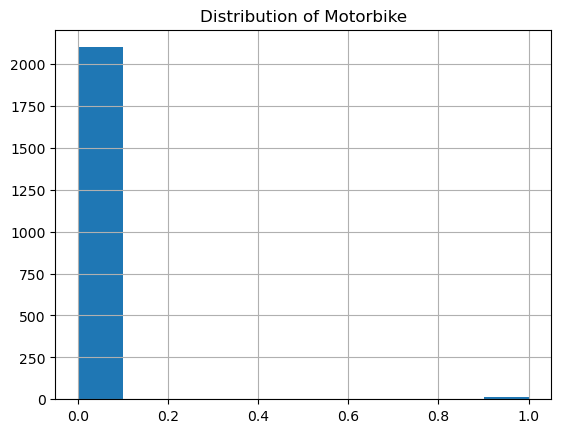

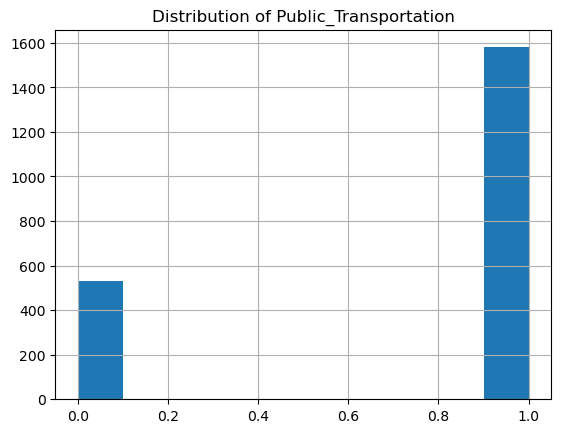

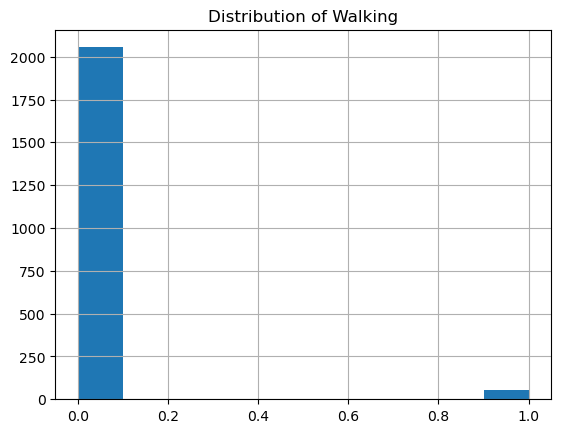

In [14]:
for col in df:
    df[col].hist()
    plt.title(f"Distribution of {col}")
    plt.show()

In [15]:
df.iloc[:,:]

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Male,yes,...,no,yes,yes,Frequently,Sometimes,no,Bike,Motorbike,Public_Transportation,Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# normalize data features before passing to model

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(df)
X

array([[0.14893617, 0.32075472, 0.18656716, ..., 0.        , 1.        ,
        0.        ],
       [0.14893617, 0.13207547, 0.12686567, ..., 0.        , 1.        ,
        0.        ],
       [0.19148936, 0.66037736, 0.28358209, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.18136247, 0.5702    , 0.70663696, ..., 0.        , 1.        ,
        0.        ],
       [0.22046672, 0.54613208, 0.70407941, ..., 0.        , 1.        ,
        0.        ],
       [0.20563211, 0.54497358, 0.70501971, ..., 0.        , 1.        ,
        0.        ]])

C:\Intel\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Intel\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Intel\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Intel\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

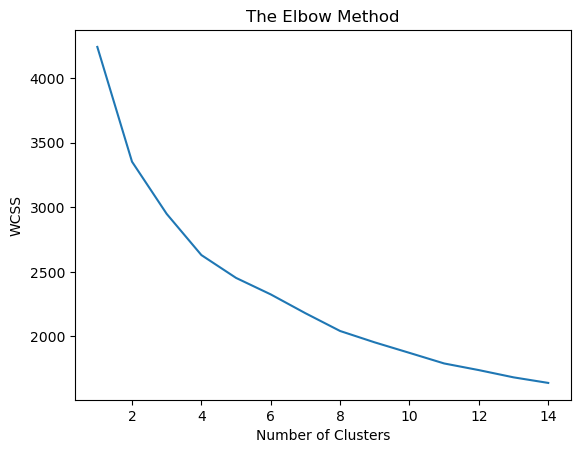

In [17]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

C:\Intel\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
#reducing dimensionality before we can visualize

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced =pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.21861535, 0.16223259])

In [20]:
sum(pca.explained_variance_ratio_)

0.38084794052490595

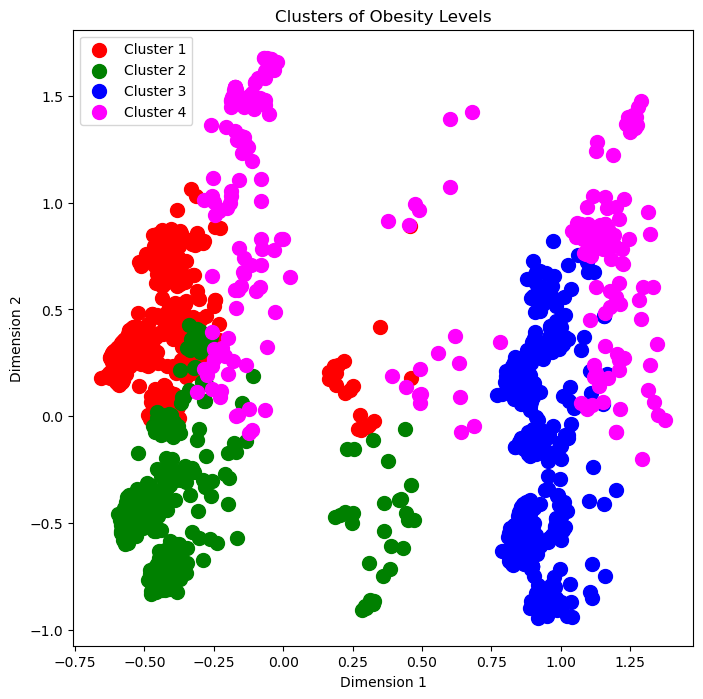

In [21]:
#Visualizing the clusters

colours = ['red','green','blue','magenta']

plt.figure(figsize=(8,8))
for i in range (4):
    plt.scatter(X_reduced[y_kmeans == i, 0], X_reduced[y_kmeans == i, 1],
                s = 100, c = colours[i] , label = 'Cluster '+str(i+1))
plt.title('Clusters of Obesity Levels')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()